length  768
shape  (768, 9)
sample
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
Pregnancies
3.482 0.062
Glucose
6.751 0.304
BloodPressure
4.792 0.059
SkinThickness
4.586 0.082
Insulin
4.682 0.277
BMI
7.594 0.344
DiabetesPedigreeFunction
8.829 0.651
Age
5.029 0.141
Confusion matrix
 [[500   0]
 [268   0]]
Classfication report
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       500
           1       0.00      0.00      0.00       268

    accuracy                           0.65       768
   macro avg       0.33      0.50

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


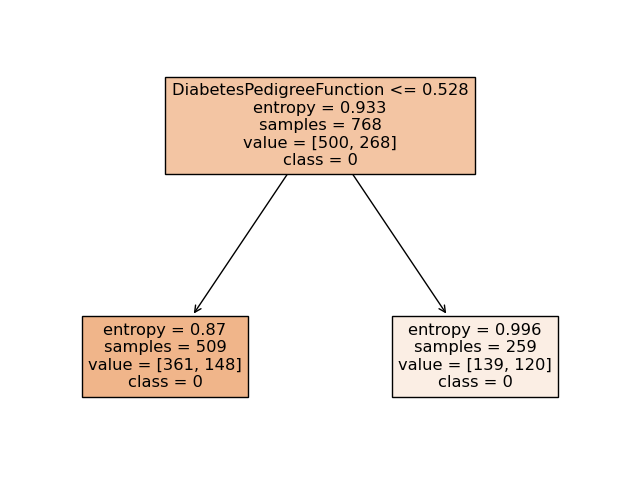

In [30]:
#decision tree using sklearn

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import math

df=pd.read_csv('diabetes.csv')
print('length ',len(df))
print('shape ',df.shape)
print('sample\n',df.head(3))

def cal_entropy(df, target_col):
    total_row=len(df)
    target_val=df[target_col].unique()
    entropy=0
    for val in target_val:
        value_count=len(df[df[target_col]==val])
        proportion=value_count/total_row
        entropy-=proportion*math.log2(proportion)
    return entropy

entropy_outcome=cal_entropy(df,'Outcome')

def cal_entropy(df, target_col):
    total_row=len(df)
    target_val=df[target_col].unique()
    entropy=0
    for val in target_val:
        value_count=len(df[df[target_col]==val])
        proportion=value_count/total_row
        entropy-=proportion*math.log2(proportion) if proportion!=0 else 0
    return entropy

def cal_infogain(df,feature,target_col):
    uniq_val=df[feature].unique()
    wei_entropy=0
    
    for val in uniq_val:
        subset=df[df[feature]==val]
        prop=len(subset)/len(df)
        wei_entropy+=prop*cal_entropy(subset,target_col)
        info_gain=entropy_outcome-wei_entropy
    return info_gain
        
for col in df.columns[:-1]:
    entropy=cal_entropy(df,col)
    infogain=cal_infogain(df,col,'Outcome')
    
    print(f"{col}\n{entropy:.3f} {infogain:.3f}") 
    
selected_feature='DiabetesPedigreeFunction'

clf=DecisionTreeClassifier(criterion="entropy",max_depth=1,random_state=42)
x=df[[selected_feature]]
y=df['Outcome']
#xx=df.drop(columns=['Outcome'])
model=clf.fit(x,y)

y_pred=model.predict(x)

cm=confusion_matrix(y,y_pred)
print('Confusion matrix\n',cm)

print('Classfication report\n',classification_report(y,y_pred))

plt.figure(figsize=(8,6))
plot_tree(clf,feature_names=[selected_feature],class_names=['0','1'],filled=True)
plt.show()

Entropy before split (Root Node Entropy): 0.9313
Entropy of Left Child: 0.7116
Entropy of Right Child: 0.9638
Weighted Entropy after Split: 0.8036
Information Gain for feature 'Glucose': 0.1277
Accuracy: 0.7208
Confusion Matrix:
[[76 23]
 [20 35]]


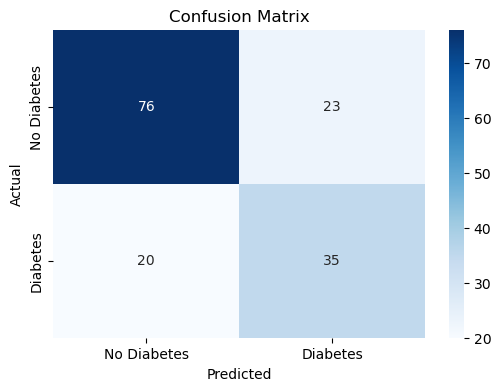

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



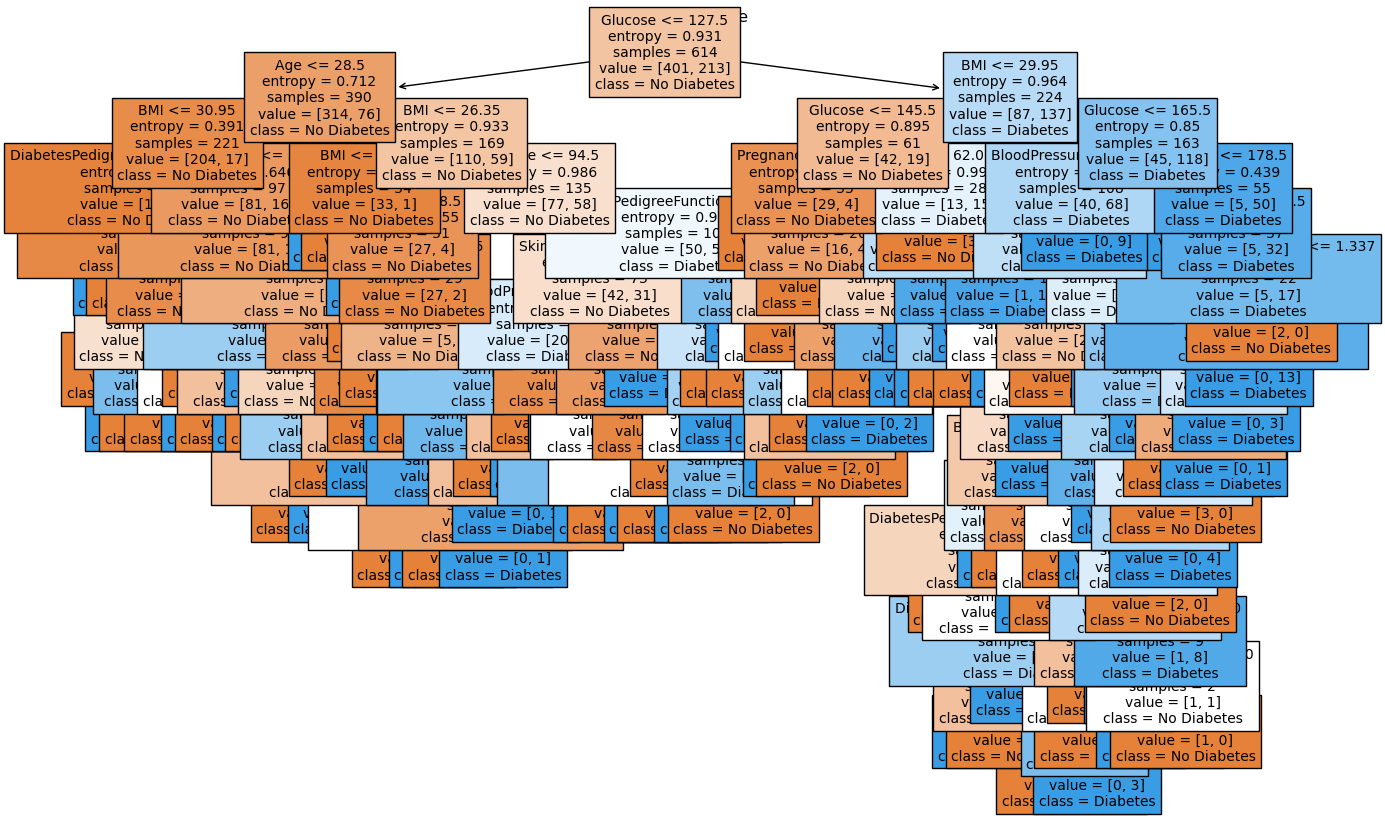

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import entropy

df = pd.read_csv("diabetes.csv") 

X = df.drop(columns=['Outcome'])  
y = df['Outcome']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def calculate_entropy(y):
    class_counts = np.bincount(y)
    probabilities = class_counts / len(y)
    return entropy(probabilities, base=2)

root_entropy = calculate_entropy(y_train)

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)


feature_index = clf.tree_.feature[0]  
split_feature = X.columns[feature_index]  
threshold = clf.tree_.threshold[0]  

left_mask = X_train.iloc[:, feature_index] <= threshold
right_mask = ~left_mask

left_entropy = calculate_entropy(y_train[left_mask])
right_entropy = calculate_entropy(y_train[right_mask])

n_total = len(y_train)
n_left = sum(left_mask)
n_right = sum(right_mask)

weighted_entropy_after_split = (n_left / n_total) * left_entropy + (n_right / n_total) * right_entropy

info_gain = root_entropy - weighted_entropy_after_split

print(f"Entropy before split (Root Node Entropy): {root_entropy:.4f}")
print(f"Entropy of Left Child: {left_entropy:.4f}")
print(f"Entropy of Right Child: {right_entropy:.4f}")
print(f"Weighted Entropy after Split: {weighted_entropy_after_split:.4f}")
print(f"Information Gain for feature '{split_feature}': {info_gain:.4f}")

y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['No Diabetes', 'Diabetes'], filled=True, fontsize=10)
plt.title("Decision Tree")
plt.show()



Accuracy: 1.0000
Confusion Matrix:
[[1 0]
 [0 2]]


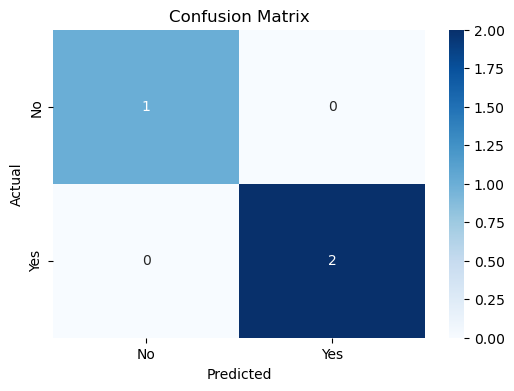

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



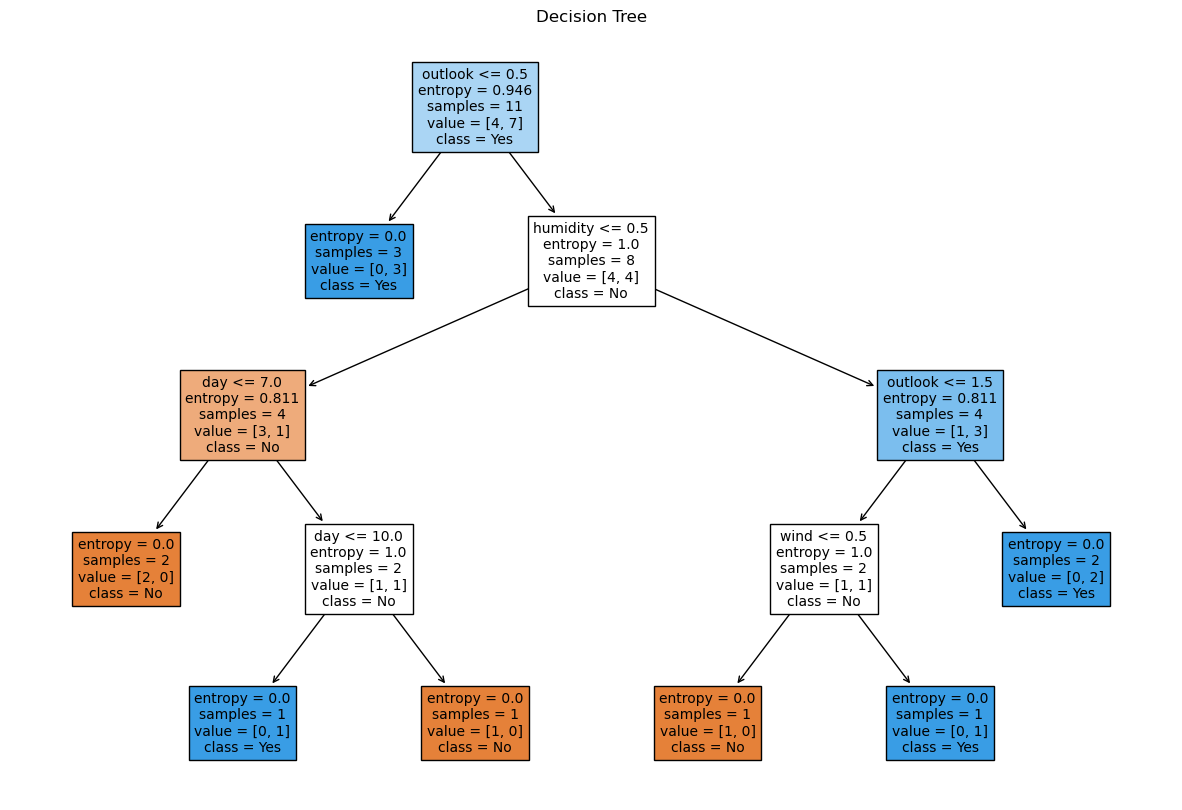

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import entropy
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("play_tennis.csv")  

X = df.drop(columns=['Play'])  
y = df['Play']  

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X = X.apply(LabelEncoder().fit_transform)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.title("Decision Tree")
plt.show()


In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

df=pd.read_csv("forestFire.csv")

#data preprocessing
le=LabelEncoder()
scale=StandardScaler()
print("Data before transforming:\n",df)
df['Fire']=le.fit_transform(df['Fire'])
print("Data after transforming:\n",df)

inplist=df.columns[:-1]
print("Data before scaling:\n",df)
df[inplist]=scale.fit_transform(df[inplist])
print("Data after scaling:\n",df)

x=df.values[:,:-1]
y=df.values[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

cf=MLPClassifier(hidden_layer_sizes=(5),activation="logistic",max_iter=200,solver="adam",learning_rate="constant",learning_rate_init=0.8)

cf.fit(x_train,y_train)

y_pred=cf.predict(x_test)

con=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",con)
cla=classification_report(y_test,y_pred)
print("classification report:\n",cla)

print("coefficient:",cf.coefs_)
print("intercept: ",cf.intercepts_)

# Print weight matrices
print("\nWeight Matrices:")
for i, weight_matrix in enumerate(clf.coefs_):
    print(f"\nLayer {i + 1} Weights (Shape {weight_matrix.shape}):\n", weight_matrix)

loss_values=cf.loss_curve_

plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

Data before transforming:
      day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  \
0      1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3   
1      2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0   
2      3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3   
3      4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0   
4      5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2   
..   ...    ...   ...          ...  ...  ...    ...   ...  ...   ...  ...   
117   26      9  2012           31   54   11    0.0  82.0  6.0  16.3  2.5   
118   27      9  2012           31   66   11    0.0  85.7  8.3  24.9  4.0   
119   28      9  2012           32   47   14    0.7  77.5  7.1   8.8  1.8   
120   29      9  2012           26   80   16    1.8  47.4  2.9   7.7  0.3   
121   30      9  2012           25   78   14    1.4  45.0  1.9   7.5  0.2   

     BUI  FWI Fire  
0    3.4  0.5    y  
1    3

AttributeError: 'DecisionTreeClassifier' object has no attribute 'coefs_'